# example for the implemented massdistributions of the Milky Way

##### the following example shows the use of density distribution for the Milky-Way and gives some figures of the distribution.

now implemented models are
* Ferrière: contains HI, HII, H2; in two regions ($R <3kpc$: arXiv:astro-ph/0702532 ; $R >3kpc$: ApJ 497:759)
* Cordes:  contains HII (Nature volume 354, pages 121–124)
* Nakanishi: contains HI (arXiv:astro-ph/0304338) and H2 (arXiv:astro-ph/0610769), implemented fit in (arXiv:1607.07886 Appendix C)


In [2]:
from crpropa import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# define densities
FER = Ferriere()
NAK = Nakanishi()
COR = Cordes()

### Model Ferrière
contains HI, HII and H2  <br>
all types can be deaktivated indiviual FER.setisforHX() <br>
dependency in inner Region: x,y,z <br>
dependency in outer Region R,z

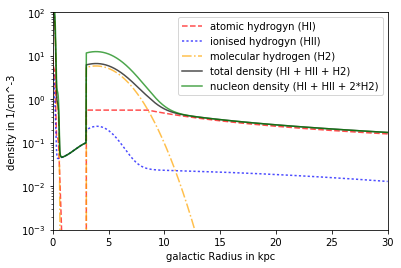

In [4]:
R = np.linspace(0,30*kpc,1000)
phi = np.linspace(0,2*np.pi,360)

n_FER_HI = np.zeros((R.shape[0],phi.shape[0]))
n_FER_HII = np.zeros((R.shape[0],phi.shape[0]))
n_FER_H2 = np.zeros((R.shape[0],phi.shape[0]))
n_FER_tot = np.zeros((R.shape[0],phi.shape[0]))
n_FER_nucl = np.zeros((R.shape[0],phi.shape[0]))

# get densitys
pos = Vector3d(0.)
for ir, r in enumerate(R):
    for ip, p in enumerate(phi):
        pos.x = r*np.cos(p)
        pos.y = r*np.sin(p)
        n_FER_HI[ir,ip]=FER.getHIDensity(pos)
        n_FER_HII[ir,ip]=FER.getHIIDensity(pos)
        n_FER_H2[ir,ip]=FER.getH2Density(pos)
        n_FER_tot[ir,ip]=FER.getDensity(pos)
        n_FER_nucl[ir,ip]=FER.getNucleonDensity(pos)

# plot radial
plt.figure()

plt.plot(R/kpc, n_FER_HI.mean(axis=1)*ccm, linestyle = '--',alpha = .7, color='red', label= 'atomic hydrogyn (HI)')
plt.plot(R/kpc, n_FER_HII.mean(axis=1)*ccm, linestyle = ':',alpha = .7, color='blue', label = 'ionised hydrogyn (HII)')
plt.plot(R/kpc, n_FER_H2.mean(axis=1)*ccm, linestyle = '-.',alpha = .7, color='orange', label= 'molecular hydrogen (H2)')
plt.plot(R/kpc, n_FER_tot.mean(axis=1)*ccm, color = 'black',alpha = .7, label = 'total density (HI + HII + H2)')
plt.plot(R/kpc, n_FER_nucl.mean(axis=1)*ccm, color ='green',alpha = .7, label = 'nucleon density (HI + HII + 2*H2)')

plt.xlabel('galactic Radius in kpc')
plt.ylabel('density in 1/cm^-3')
plt.yscale('log')
plt.axis([0,30,10**-3,10**2])
plt.legend()
plt.show()

### Model Cordes 
contains HII component (can not be deaktivated) <br>
HIIDensity, Density and NucleonDensity are the same <br>
dependency: R,z

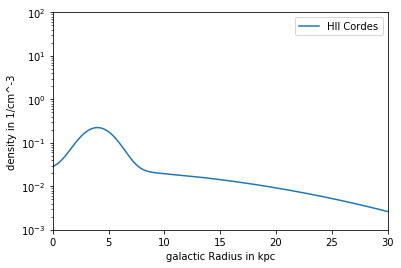

In [5]:
n_COR_R= np.zeros(R.shape)

pos = Vector3d(0.)
for ir, r in enumerate(R):
    pos.x = r
    n_COR_R[ir]= COR.getDensity(pos)

plt.figure()
plt.plot(R/kpc, n_COR_R*ccm, label = 'HII Cordes')

plt.xlabel('galactic Radius in kpc')
plt.ylabel('density in 1/cm^-3')
plt.yscale('log')
plt.axis([0,30,10**-3,10**2])
plt.legend()
plt.show()

### Model Nakanishi
contains HI and H2 <br>
both parts can be deactivated setisforHX <br>
dependency: R,z

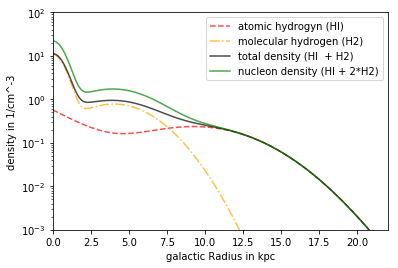

In [6]:
n_NAK_HI = np.zeros(R.shape)
n_NAK_H2 = np.zeros(R.shape)
n_NAK_tot = np.zeros(R.shape)
n_NAK_nucl= np.zeros(R.shape)

pos = Vector3d(0.)

for ir, r in enumerate(R):
    pos.x=r
    n_NAK_HI[ir]=NAK.getHIDensity(pos)
    n_NAK_H2[ir]=NAK.getH2Density(pos)
    n_NAK_tot[ir]=NAK.getDensity(pos)
    n_NAK_nucl[ir]=NAK.getNucleonDensity(pos)

# plot radial
plt.figure()

plt.plot(R/kpc, n_NAK_HI*ccm, linestyle = '--',alpha = .7, color='red', label= 'atomic hydrogyn (HI)')
plt.plot(R/kpc, n_NAK_H2*ccm, linestyle = '-.',alpha = .7, color='orange', label= 'molecular hydrogen (H2)')
plt.plot(R/kpc, n_NAK_tot*ccm, color = 'black',alpha = .7, label = 'total density (HI  + H2)')
plt.plot(R/kpc, n_NAK_nucl*ccm, color ='green',alpha = .7, label = 'nucleon density (HI + 2*H2)')

plt.xlabel('galactic Radius in kpc')
plt.ylabel('density in 1/cm^-3')
plt.yscale('log')
plt.axis([0,22,10**-3,10**2])
plt.legend()
plt.show()

### Advanced use of Custom density
for egsample to combine the HI Component from Ferriere, the HII Component from Cordes and the H2 from Nakanishi

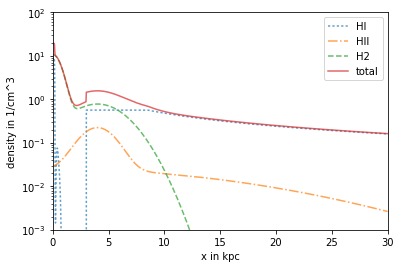

In [7]:
CD = CustomDensity()

FER.setIsForHII(False)
FER.setIsForH2(False)
CD.add(FER) #only the activ HI is added

CD.add(COR) # only the activ H2 is added, contains no other typ

NAK.setIsForHI(False)
CD.add(NAK)

# plot types and sum of densities (along x-axis)

n_CD_HI = np.zeros(R.shape)
n_CD_HII = np.zeros(R.shape)
n_CD_H2 = np.zeros(R.shape)
n_CD_tot = np.zeros(R.shape)

pos = Vector3d(0.)
for ir, r in enumerate(R):
    pos.x = r
    n_CD_HI[ir] = CD.getHIDensity(pos)
    n_CD_HII[ir] = CD.getHIIDensity(pos)
    n_CD_H2[ir] = CD.getH2Density(pos)
    n_CD_tot[ir] = CD.getDensity(pos)
    
plt.figure()
plt.plot(R/kpc, n_CD_HI*ccm, label= 'HI', linestyle =':',alpha = .7)
plt.plot(R/kpc, n_CD_HII*ccm, label = 'HII', linestyle ='-.',alpha = .7)
plt.plot(R/kpc, n_CD_H2*ccm, label = 'H2', linestyle = '--',alpha = .7)
plt.plot(R/kpc, n_CD_tot*ccm, label= 'total', linestyle='-',alpha = .7)

plt.yscale('log')
plt.xlabel('x in kpc')
plt.ylabel('density in 1/cm^3')
plt.axis([0,30,10**-3,100])
plt.legend()
plt.show()